#Goals
1.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [ ]:
df=pd.read_csv('online_shoppers_intention.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [ ]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Month', ylabel='Revenue'>

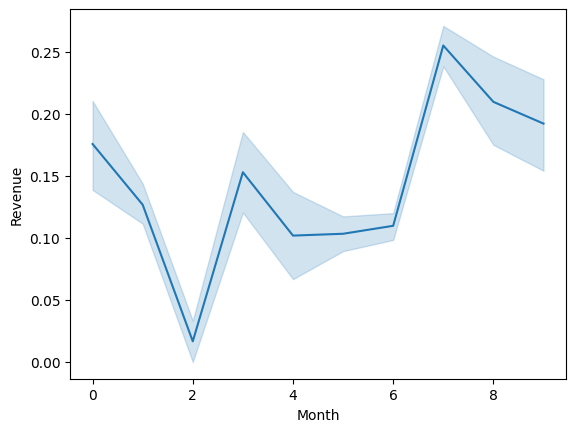

In [ ]:
sns.lineplot(x='Month',y='Revenue',data=df)

In [ ]:
X = df.drop('Revenue',axis=1)
y = df['Revenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [ ]:
ssc = StandardScaler()
X_train_sc = ssc.fit_transform(X_train)
X_test_sc = ssc.transform(X_test)

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_sc,y_train)
y_pred = lr_model.predict(X_test_sc)
lr_score=accuracy_score(y_test,y_pred)
lr_score*100


88.69315854158131

In [ ]:
X_train_noise = np.hstack([X_train_sc,np.random.rand(X_train_sc.shape[0],10)])
X_test_noise = np.hstack([X_test_sc,np.random.rand(X_test_sc.shape[0],10)])

knn_noise = KNeighborsClassifier()
knn_noise.fit(X_train_noise,y_train)
y_pred_noise = knn_noise.predict(X_test_noise)
knn_acc = accuracy_score(y_test,y_pred_noise)
knn_acc*100

87.05448586644818

In [ ]:
train_score,test_score=[],[]
k_range=range(1,61)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sc,y_train)
    train_score.append(model.score(X_train_sc,y_train))
    test_score.append(model.score(X_test_sc,y_test))

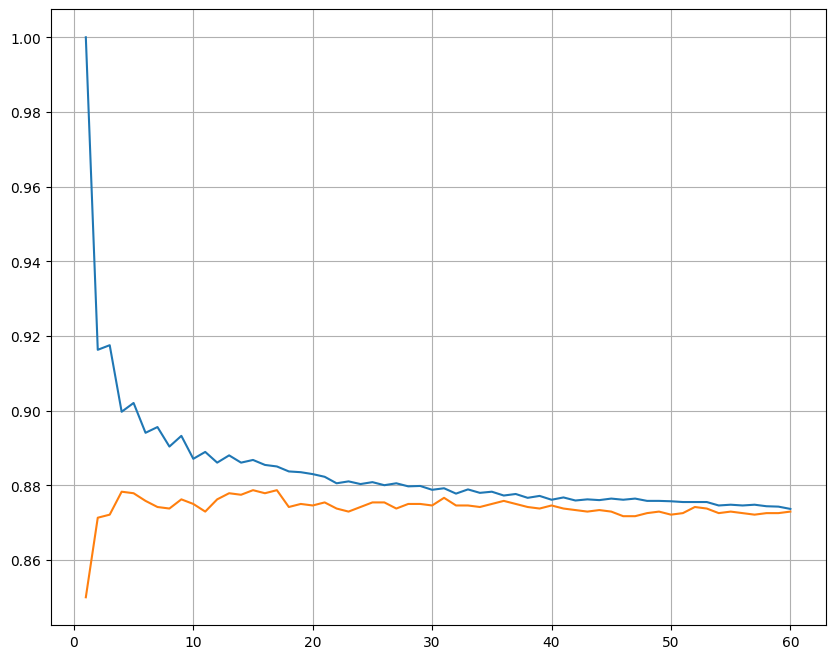

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k_range,train_score,label='Training Score')
plt.plot(k_range,test_score,label='Testing Score')
plt.grid('True')
plt.show()

In [ ]:
test_score

[0.8500614502253175,
 0.8713641950020483,
 0.8721835313396149,
 0.8783285538713642,
 0.8779188857025809,
 0.8758705448586644,
 0.8742318721835314,
 0.8738222040147481,
 0.8762802130274477,
 0.8750512085210979,
 0.8730028676771815,
 0.8762802130274477,
 0.8779188857025809,
 0.8775092175337976,
 0.8787382220401475,
 0.8779188857025809,
 0.8787382220401475,
 0.8742318721835314,
 0.8750512085210979,
 0.8746415403523147,
 0.8754608766898812,
 0.8738222040147481,
 0.8730028676771815,
 0.8742318721835314,
 0.8754608766898812,
 0.8754608766898812,
 0.8738222040147481,
 0.8750512085210979,
 0.8750512085210979,
 0.8746415403523147,
 0.876689881196231,
 0.8746415403523147,
 0.8746415403523147,
 0.8742318721835314,
 0.8750512085210979,
 0.8758705448586644,
 0.8750512085210979,
 0.8742318721835314,
 0.8738222040147481,
 0.8746415403523147,
 0.8738222040147481,
 0.8734125358459648,
 0.8730028676771815,
 0.8734125358459648,
 0.8730028676771815,
 0.8717738631708316,
 0.8717738631708316,
 0.87259319950

In [ ]:
train_score

[1.0,
 0.9163252765260139,
 0.9175542810323638,
 0.8997337156902908,
 0.9020893076607948,
 0.8941007783695207,
 0.895637034002458,
 0.8904137648504711,
 0.8932814420319541,
 0.8871364195002048,
 0.8889799262597297,
 0.8861122490782466,
 0.8880581728799672,
 0.8861122490782466,
 0.8868291683736174,
 0.8854977468250717,
 0.8850880786562884,
 0.8837566571077428,
 0.8835518230233511,
 0.883039737812372,
 0.8823228185170012,
 0.8805817287996722,
 0.8810938140106513,
 0.8803768947152806,
 0.8808889799262597,
 0.8800696435886931,
 0.8805817287996722,
 0.8797623924621057,
 0.8798648095043016,
 0.8788406390823433,
 0.8792503072511266,
 0.8778164686603851,
 0.8789430561245392,
 0.8780213027447767,
 0.8783285538713642,
 0.877304383449406,
 0.8777140516181893,
 0.876689881196231,
 0.8772019664072102,
 0.8761777959852519,
 0.8767922982384269,
 0.8759729619008603,
 0.8762802130274477,
 0.8760753789430561,
 0.8764850471118394,
 0.8761777959852519,
 0.8764850471118394,
 0.8758705448586644,
 0.87587054

In [ ]:
knn_noise = KNeighborsClassifier(n_neighbors=18)
knn_noise.fit(X_train_noise,y_train)
y_pred_noise = knn_noise.predict(X_test_noise)
knn_acc = accuracy_score(y_test,y_pred_noise)
knn_acc*100

87.66898811962311

In [ ]:
df.shape

(12205, 18)

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca,y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
knn_pca_acc = accuracy_score(y_test,y_pred_pca)
knn_pca_acc*100

88.07865628840639

In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
0,10297
1,1908


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train_sc,y_train)

In [ ]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_smote,y_train_smote)
y_pred_pca = knn_pca.predict(X_test_sc)
knn_sm_acc = accuracy_score(y_test,y_pred_pca)
knn_sm_acc*100

78.82015567390414

In [ ]:
mode_list={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}
model_score = {}
for name,model in mode_list.items():
    model.fit(X_train_sc,y_train)
    y_pred = model.predict(X_test_sc)
    model_score[name] = {
        'accuracy':accuracy_score(y_test,y_pred),
        'AUC'  :roc_auc_score(y_test,y_pred),

    }

In [ ]:
model_score

{'LogisticRegression': {'accuracy': 0.8869315854158132,
  'AUC': np.float64(0.6845842158929384)},
 'KNeighborsClassifier': {'accuracy': 0.8779188857025809,
  'AUC': np.float64(0.6909685228177151)},
 'DecisionTreeClassifier': {'accuracy': 0.8619418271200328,
  'AUC': np.float64(0.7497260145091528)},
 'RandomForestClassifier': {'accuracy': 0.9045473166734944,
  'AUC': np.float64(0.7803113136301107)}}

In [ ]:
Score_lst = pd.DataFrame(model_score).T


In [ ]:
Score_lst

,accuracy,AUC
LogisticRegression,0.886932,0.684584
KNeighborsClassifier,0.877919,0.690969
DecisionTreeClassifier,0.861942,0.749726
RandomForestClassifier,0.904547,0.780311


In [ ]:
cross_val_score(LogisticRegression(max_iter=1000),X_train_sc,y_train,cv=5)

array([0.8827445 , 0.88530466, 0.88325653, 0.88735279, 0.87807377])